# mrbles pipeline example

## Load necessary modules

In [2]:
import os
import gc
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

In [3]:
importlib.reload(mrbles)
importlib.reload(mrbles.data)
importlib.reload(mrbles.core)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [4]:
# image_folder = r"C:\DATA\Huy"
# image_folders = {"50 nM" : r"C:\DATA\Huy", 
#                  "100 nM" : r"C:\DATA\Huy",
#                  "250 nM" : "C:\DATA\Huy",
#                  "500 nM" : r"C:\DATA\Huy",
#                  "1000 nM" : r"C:\DATA\Huy"
# }
# image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [5]:
# image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180111 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [6]:
# image_folders = {"32 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "63 nM" : r"C:\DATA\Huy\20180112 CN", 
#                  "125 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "250 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "500 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "1000 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "2000 nM" : r"C:\DATA\Huy\20180112 CN",
#                  "Biotin" : r"C:\DATA\Huy\20180111 CN"
#                  #"NIR" : r"C:\DATA\Huy\20180111 CN"
# }
# image_patterns = {"32 nM" : r"20180111_CN_Final_Super_32nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "63 nM" : r"20180111_CN_Final_Super_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
#                   "125 nM" : r"20180111_CN_Final_Super_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "250 nM" : "20180111_CN_Final_Super_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "500 nM" : r"20180111_CN_Final_Super_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "1000 nM" : r"20180111_CN_Final_Super_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "2000 nM" : r"20180111_CN_Final_Super_2uMd_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
#                   "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
#                   #"NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

In [7]:
image_folders = {"NIR_calib" : r"C:\DATA\Huy\20180111 CN",
                 "NIR_super" : r"C:\DATA\Huy\20180112 CN"
}

image_patterns = {"NIR_calib" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "NIR_super" : r"20180111_CN_Final_Super_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(260, 776)
mrbles_images.crop_y = slice(206, 776)
mrbles_images.load()
mrbles_images.rename_channel('Cy5-E', 'Cy5')

In [8]:
biotin_folders = {"Biotin" : r"C:\DATA\Huy\20180111 CN"
}

biotin_patterns = {"Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
                  
}
mrbles_biotin = mrbles.Images(folders=biotin_folders, file_patterns=biotin_patterns)
mrbles_biotin.crop_x = slice(90, 990)
mrbles_biotin.crop_y = slice(90, 990)
mrbles_biotin.load()
mrbles_images.rename_channel('Cy5-E', 'Cy5')

If no error was thrown the images can be loaded into memory.

In [9]:
#mrbles_images.load()

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

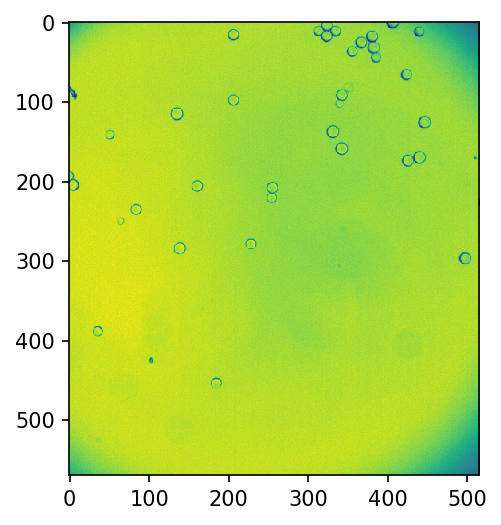

In [10]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['NIR_calib', 2, 'Brightfield']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [11]:
find_mrbles = mrbles.Find(bead_size=14, border_clear=True)
find_mrbles.settings.eccen_max = 0.65
find_mrbles.settings.parallelize = True

In [12]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Mean bead radius: 14.47
Number of beads in set NIR_calib: 648
Number of beads in set NIR_super: 236
Total number of beads: 884


In [13]:
find_biotin = mrbles.Find(bead_size=14, border_clear=True, circle_size=350)
find_biotin.settings.eccen_max = 0.65
find_biotin.settings.parallelize = True
find_biotin.find(mrbles_biotin[:, : , 'Brightfield'])

Mean bead radius: 14.13
Number of beads in set Biotin: 3223
Total number of beads: 3223


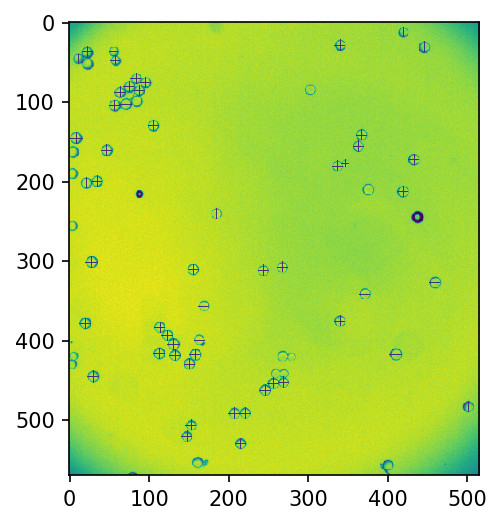

In [14]:
plt.figure(dpi=150)
plt.imshow(find_mrbles['NIR_super', 1, 'mask_check'])

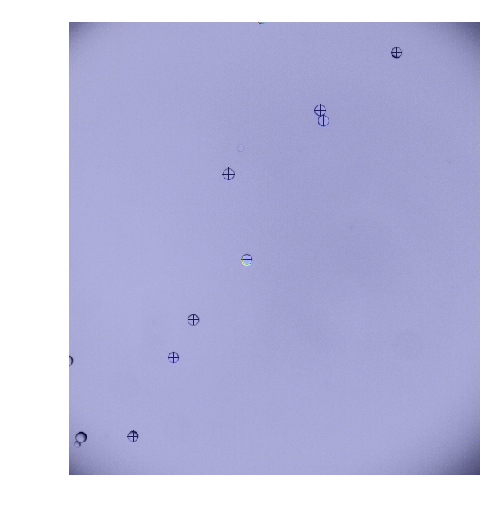

In [15]:
plt.figure(dpi=150)
find_mrbles.settings.show_image_overlay(find_mrbles['NIR_super', 10, 'mask_check'], mrbles_images['NIR_super', 10, 'Cy5'])

## Create Reference spectra

In [16]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\Huy\20180111 CN\20180111_CN_Final_Normal_biotinb_5"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20180111_CN_Final_Normal_biotinb_5_MMStack_Pos0.ome.tif"
}

In [17]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(390, 738), slice(377, 733)]

In [18]:
spec_object.load()

Mean bead radius: 15.65
Number of beads in set Dy: 270
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Number of beads in set Eu: 203
Total number of beads: 1287


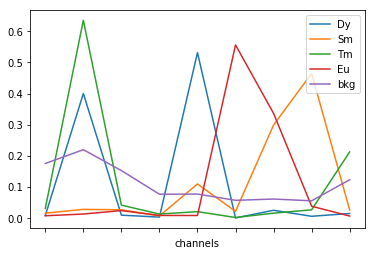

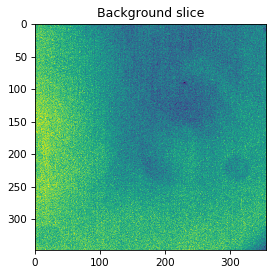

In [19]:
spec_object.plot()

## Spectral unmixing and get ratios

In [20]:
ratio_images = mrbles.Ratio(spec_object)

In [21]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images[:, :, ['Cy5']])

c:\python36\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:25: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:29: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



In [22]:
ratio_images

{'NIR_calib': <xarray.DataArray (f: 23, c: 9, y: 570, x: 516)>
array([[[[1094, ..., 864],
         ...,
         [996, ..., 905]],

        ...,

        [[1611.1064766307884, ..., 1464.122276982097],
         ...,
         [2232.8870347197417, ..., 1794.574199486684]]],


       ...,


       [[[1056, ..., 1128],
         ...,
         [1050, ..., 895]],

        ...,

        [[1559.0658395624423, ..., 1530.8364965043654],
         ...,
         [2003.3160619564194, ..., 1987.617888802236]]]], dtype=object)
Coordinates:
  * c        (c) object 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' 'Sm_ratio' 'Tm' ...
Dimensions without coordinates: f, y, x, 'NIR_super': <xarray.DataArray (f: 14, c: 9, y: 570, x: 516)>
array([[[[899, ..., 782],
         ...,
         [1086, ..., 1070]],

        ...,

        [[1564.2180931761889, ..., 1570.1623951187187],
         ...,
         [2222.360408000764, ..., 1761.893711748744]]],


       ...,


       [[[996, ..., 1034],
         ...,
         [1020, ..., 1107]

In [23]:
ratio_biotin = mrbles.Ratio(spec_object)
ratio_biotin.get(mrbles_biotin[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_biotin[:, :, ['Cy5-E 10%']])

c:\python36\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:25: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.

c:\python36\lib\site-packages\xarray\core\dtypes.py:29: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.



## Extract data from each MRBLE

In [24]:
extract_data = mrbles.Extract()

In [25]:
extract_data.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [26]:
extract_data.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 884
Post-filter: 829
Filtered: 55 (6.2%)


In [28]:
extract_biotin = mrbles.Extract()
extract_biotin.get(ratio_biotin[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5-E 10%']], 
                   find_biotin[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])
extract_biotin.filter(bkg_factor=2.0, ref_factor=2.0, bkg='bkg.mask_full', ref='Eu.mask_inside')

Pre-filter: 3223
Post-filter: 3007
Filtered: 216 (6.7%)


## Decode

In [29]:
# Target file location
# TARGET_FOLDER = r"C:\DATA\CodeSets"
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
#target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]

seq_file = pd.read_excel(r'C:\DATA\Huy\20180105_SEQ_CN_Final-Match-List.xlsx')
#seq_file = seq_file[(seq_file.code != 18) & (seq_file.code != 27) & (seq_file.code != 47)]
target = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
seq_file.loc[(seq_file.code==12), ('Dy', 'Sm', 'Tm')] = [0, 0.41682, 0.02844]
seq_file.loc[(seq_file.code==13), ('Dy', 'Sm', 'Tm')] = [0, 0.47785, 0.04081]
#target = seq_file.loc[(seq_file.set=='match'), ['Dy', 'Sm', 'Tm']].values
target_biotin = seq_file.loc[:, ['Dy', 'Sm', 'Tm']].values
#sequences = seq_file.loc[(seq_file.set=='match')].reset_index(drop=True)
sequences = seq_file.reset_index(drop=True)
sequences_biotin = seq_file.reset_index(drop=True)

In [30]:
biotin_set = extract_biotin.data.loc[('Biotin')]

In [31]:
biotin_set

Cy5-E 10%.mask_bkg  Cy5-E 10%.mask_full  Cy5-E 10%.mask_inside  \
0  1                 426.5              14138.5                13222.0   
   2                 428.0              15621.5                15645.0   
   3                 449.0              14640.0                13695.5   
   4                 467.0              15137.5                15306.0   
   5                 496.5              12286.0                11492.0   
   6                 469.5              13055.0                12382.5   
   7                 452.5              13695.0                13099.5   
   8                 469.0              14515.0                13898.5   
   9                 364.0              13886.0                14913.0   
   10                501.5              13949.0                13178.0   
   11                476.0              16933.5                16653.0   
   14                461.0              10711.0                 9363.0   
   15                479.0              14546.0                13555.0   
   16                585.0              13560.5                12755.5   
   17                440.0              11761.0                11355.0   
   18                446.0              14317.0                12472.0   
   19                422.0              10658.0                10205.5   
   20                422.0              12050.0                10577.0   
   21                401.0              12349.0                11665.0   
   22                519.0              13598.0                12188.0   
   23                486.0              18961.5                15805.0   
   24                410.0              13846.0                13612.0   
   25                440.0              19393.0                19013.0   
   26                378.0              11109.0                 9799.0   
   27                404.5              11226.0                10658.5   
   28                393.5              12653.0                11687.0   
   29                397.0              15921.0                14495.0   
   31                390.0              18510.0                16927.5   
1  0                 429.0              10869.0                10449.5   
   1                 473.5              12546.5                11592.0   
...                    ...                  ...                    ...   
27 242               457.0              11183.0                10087.0   
28 0                 418.0              12434.5                11331.0   
   1                 461.0              15217.0                15399.0   
   2                 464.0              14978.0                13746.0   
   3                 584.0              10839.0                 9971.5   
   4                 457.0              13609.0                13060.5   
   5                 369.0               9975.0                 9620.0   
   6                 541.5              13464.0                12241.0   
   7                 464.0              13064.0                12395.5   
   8                1419.0              11901.0                10054.0   
   9                 595.5              11570.0                10681.0   
   10                508.5               9495.5                 8745.0   
   11                374.0               9383.5                 9095.0   
   12               7682.5               9903.0                 9670.0   
   13                571.5              11014.0                 9604.0   
   14                576.0              11869.5                11317.5   
   15                483.0              15193.0                13782.5   
   16                467.0              14133.0                13723.0   
   17                431.0               9083.5                 8560.0   
   18                439.5              13279.0                12921.0   
   20                404.0               8970.0                 8573.0   
   21                426.5              11235.0                10142.5   
   22       

In [32]:
mrbles_decode_biotin = mrbles.Decode(target_biotin)

In [33]:
mrbles_decode_biotin.decode(biotin_set.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=biotin_set)

Delta:  0.1236497653384549
Delta:  0.048538054076370726
Delta:  0.06914822763701677
Delta:  0.06289670282803231
Delta:  0.03799809769094744
Delta:  0.01084315895545943
Delta:  0.0004676417574345036
Delta:  0.0
Converged after: 8
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.7421613052051145
AIC: 248589.57802991674
BIC: 251467.74445956823


In [34]:
extract_set_biotin = mrbles_decode_biotin.data.loc[(mrbles_decode_biotin.data.confidence > 0.95), ('code', 'flag', 'Cy5-E 10%.mask_ring')]
extract_set_biotin.loc[:, 'Cy5-E 10%.mask_ring'] -= mrbles_decode_biotin.data.loc[:, ('Cy5-E 10%.mask_bkg')]

In [35]:
mrbles_biotin_data = mrbles.Analyze(seq_list=sequences_biotin)

In [36]:
mrbles_biotin_data.analyze(extract_set_biotin)

c:\python36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\python36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [37]:
mrbles_biotin_data.data

,mean,median,sd,se,N,CV,set.sequence,set.code
code,,,,,,,,
0,19511.060606,18636.75,3961.593632,491.375215,66,0.203043,AGIVPIHVTHAPGEE,1
1,18304.634615,17768.00,3408.090717,388.387983,78,0.186187,HPVIVITGPHEE,2
2,17977.987805,17534.50,3577.716371,397.524041,82,0.199005,HPRIVITGPHEE,3
3,24421.787234,23072.75,4990.079061,517.447094,94,0.204329,HPLIVITGPHEE,4
4,16436.305000,16406.25,3012.880403,302.805874,100,0.183306,HPVIVIEGPHEE,5
5,18691.235714,19008.00,2642.011371,318.060793,70,0.141350,HPVIVLTGPHEE,6
6,18085.648649,17694.00,5341.961295,625.229278,74,0.295370,IPVIVITGPHEE,7
7,16653.833333,16345.50,3687.371962,420.215034,78,0.221413,HPVIVITGLHEE,8
8,16600.887097,16345.75,3250.327658,416.161812,62,0.195792,HPVIVITMPHEE,9


# Concentrations

In [43]:
mrbles_decode = mrbles.Decode(target)

In [44]:
mrbles_decode.settings.icp.train = True

In [45]:
bead_set = extract_data.data

In [46]:
mrbles_decode.decode(bead_set.loc[:, ('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], combine_data=bead_set)

Delta:  0.11493502865148823
Delta:  0.06012882066808084
Delta:  0.03965457945207184
Delta:  0.043772550620724215
Delta:  0.03160122041869787
Delta:  0.010804257942917986
Delta:  0.007670696591953875
Delta:  0.005011098373277521
Delta:  0.0006092133279732112
Delta:  0.0
Converged after: 10
Number of unique codes found: 46
Missing codes: [12 46]
Silhouette Coefficient: 0.7411655140498966
AIC: 92373.82072430836
BIC: 94634.80617861816


In [47]:
mrbles_final = mrbles.Analyze(seq_list=sequences)

In [48]:
extract_set = mrbles_decode.data.loc[(mrbles_decode.data.confidence > 0.95), ('code', 'flag', 'Cy5.mask_ring')]
extract_set.loc[:, 'Cy5.mask_ring'] -= mrbles_decode.data.loc[:, ('Cy5.mask_bkg')]

In [49]:
mrbles_final.analyze(extract_set)

c:\python36\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\python36\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning:

invalid value encountered in double_scalars



In [50]:
mrbles_final.data.min()

mean                   -79.7273
median                      -79
sd                            0
se                      2.33073
N                             1
CV                     -38.8706
set.sequence    AGIVPIHVTHAPGEE
set.code                      1
dtype: object

In [51]:
norm_data = mrbles_biotin_data.data
norm_max = norm_data['mean'].max()

In [52]:
norm_data['mean_scaled'] = mrbles_biotin_data.data['mean'] / norm_data['mean'].max()
norm_data['median_scaled'] = mrbles_biotin_data.data['median'] / norm_data['median'].max()
norm_data['sd_scaled'] = mrbles_biotin_data.data['sd'] / norm_data['mean'].max()
norm_data['se_scaled'] = mrbles_biotin_data.data['sd_scaled'] / np.sqrt(norm_data['N'])

In [53]:
norm_data

,mean,median,sd,se,N,CV,set.sequence,set.code,mean_scaled,median_scaled,sd_scaled,se_scaled
code,,,,,,,,,,,,
0,19511.060606,18636.75,3961.593632,491.375215,66,0.203043,AGIVPIHVTHAPGEE,1,0.615242,0.694455,0.124921,0.015377
1,18304.634615,17768.00,3408.090717,388.387983,78,0.186187,HPVIVITGPHEE,2,0.577200,0.662083,0.107467,0.012168
2,17977.987805,17534.50,3577.716371,397.524041,82,0.199005,HPRIVITGPHEE,3,0.566900,0.653383,0.112816,0.012458
3,24421.787234,23072.75,4990.079061,517.447094,94,0.204329,HPLIVITGPHEE,4,0.770092,0.859753,0.157352,0.016230
4,16436.305000,16406.25,3012.880403,302.805874,100,0.183306,HPVIVIEGPHEE,5,0.518286,0.611341,0.095005,0.009501
5,18691.235714,19008.00,2642.011371,318.060793,70,0.141350,HPVIVLTGPHEE,6,0.589391,0.708289,0.083311,0.009958
6,18085.648649,17694.00,5341.961295,625.229278,74,0.295370,IPVIVITGPHEE,7,0.570295,0.659326,0.168448,0.019582
7,16653.833333,16345.50,3687.371962,420.215034,78,0.221413,HPVIVITGLHEE,8,0.525145,0.609077,0.116274,0.013165
8,16600.887097,16345.75,3250.327658,416.161812,62,0.195792,HPVIVITMPHEE,9,0.523476,0.609087,0.102493,0.013017


In [54]:
beads_data = mrbles_final.data

In [55]:
beads_data

mean   median          sd          se   N         CV  \
set       code                                                                
NIR_calib 0       -2.000000    -6.50   52.969575   10.010309  29 -26.484787   
          1       74.218750    54.50  138.354557   24.849212  32   1.864146   
          2      104.977273   110.25   45.817691    9.998240  22   0.436453   
          3      100.409091   106.00   49.604260   10.824537  22   0.494022   
          4      -61.833333   -67.00   20.150820    3.951901  27  -0.325889   
          5       33.884615    25.25   33.030670    6.606134  26   0.974798   
          6      234.115385   203.50  121.775353   24.355071  26   0.520151   
          7       43.153846    34.00   40.332457   11.642977  13   0.934620   
          8       22.500000    24.00   28.028260    8.450838  12   1.245700   
          9      -13.740741   -18.00   53.434170   10.479303  27  -3.888740   
          10      90.500000    82.50   64.260125   20.320836  11   0.710057   
          11     -43.448276   -40.00   30.029395    5.675022  29  -0.691153   
          13     128.230769    83.00  138.406955   39.954646  13   1.079358   
          14     -17.161290   -20.00   34.339244    6.269459  31  -2.000971   
          15     -12.666667   -13.50   16.952548   11.987262   3  -1.338359   
          16     -37.166667   -51.00   34.993650   15.649636   6  -0.941533   
          21      88.000000    76.50   75.216506   16.413587  22   0.854733   
          27     206.500000   206.50    0.000000         NaN   1   0.000000   
          28     -17.500000   -17.50   32.000000   32.000000   2  -1.828571   
          29     -45.500000   -49.00   19.356700    6.121126  11  -0.425422   
          30      65.450000    52.50   31.229353   10.409784  10   0.477148   
          31    1441.816667  1297.25  405.567452   75.311985  30   0.281289   
          32     609.458333   577.25  311.782674   94.006013  12   0.511573   
          33     398.928571   354.00  188.984207   77.152480   7   0.473729   
          34     805.000000   805.00    0.000000         NaN   1   0.000000   
          38     -79.727273   -79.00   27.922265    8.829796  11  -0.350222   
          39     286.000000   214.00  228.781631   43.235664  29   0.799936   
          40      99.750000    60.25   75.227738   25.075913  10   0.754163   
          41     -23.911765   -38.50   39.313684    9.828421  17  -1.644115   
          42       8.468750    15.00   30.047602    5.396709  32   3.548056   
          43       7.323529     1.00   35.345747    8.836437  17   4.826327   
          44      -3.650000     9.00   32.105334    7.365469  20  -8.795982   
          45      -1.350000   -13.00   52.475256   12.038649  20 -38.870560   
NIR_super 17      25.500000    25.50   57.000000   57.000000   2   2.235294   
          18       7.875000     7.25    4.036939    2.330728   4   0.512627   
          19      94.945946    99.50   79.403416   13.233903  37   0.836301   
          20     -12.833333   -21.50   41.863933   11.188607  15  -3.262125   
          22     939.263158   883.00  277.904535   65.502727  19   0.295875   
          23     404.000000   398.00  250.757519   88.656171   9   0.620687   
          24     786.891304   635.50  644.696085  137.449667  23   0.819295   
          25     894.119048   701.50  749.039240  167.490266  21   0.837740   
          26     482.500000   558.50  226.444806  130.737969   4   0.469316   
          35     -17.357143   -12.50   29.758809    8.253609  14  -1.714499   
          36      54.026316    53.50   64.802630   15.274126  19   1.199464   
          37    1547.224138  1637.00  753.717689  142.439255  29   0.487142   
          41      -6.000000    -6.00    0.000000         NaN   1  -0.000000   
          47      77.307692    58.00   69.087887   19.943955  13   0.893674   

                    set.sequence  set.code  
set       code                              
NIR_calib 0      AGIVPIHVTHAPGEE         1  
          1     

In [56]:
set_codes = np.unique(beads_data['set.code'])

In [57]:
norm_data.loc[norm_data['set.code'] == 20, 'mean_scaled'].values

array([0.56664423])

In [58]:
for code in set_codes:
    norm_mean = norm_data.loc[norm_data['set.code'] == code, 'mean_scaled'].values
    norm_sd = norm_data.loc[norm_data['set.code'] == code, 'sd_scaled'].values
    
    data_mean = beads_data.loc[beads_data['set.code'] == code, 'mean'].values
    data_median = beads_data.loc[beads_data['set.code'] == code, 'median'].values
    data_sd = beads_data.loc[beads_data['set.code'] == code, 'sd'].values
    data_n = beads_data.loc[beads_data['set.code'] == code, 'N'].values
    
    mean_norm = (data_mean / norm_mean)
    median_norm = (data_median / norm_mean)
    sd_norm = np.abs(mean_norm) * (np.sqrt((data_sd / data_mean) ** 2 + (norm_sd / norm_mean)**2))
    cv_norm = mean_norm / sd_norm
    se_norm = sd_norm / np.sqrt(data_n)
    
    beads_data.loc[beads_data['set.code'] == code, 'mean_norm'] = mean_norm
    beads_data.loc[beads_data['set.code'] == code, 'median_norm'] = median_norm
    beads_data.loc[beads_data['set.code'] == code, 'sd_norm'] = sd_norm
    beads_data.loc[beads_data['set.code'] == code, 'cv_norm'] = cv_norm
    beads_data.loc[beads_data['set.code'] == code, 'se_norm'] = se_norm

In [59]:
beads_data

mean   median          sd          se   N         CV  \
set       code                                                                
NIR_calib 0       -2.000000    -6.50   52.969575   10.010309  29 -26.484787   
          1       74.218750    54.50  138.354557   24.849212  32   1.864146   
          2      104.977273   110.25   45.817691    9.998240  22   0.436453   
          3      100.409091   106.00   49.604260   10.824537  22   0.494022   
          4      -61.833333   -67.00   20.150820    3.951901  27  -0.325889   
          5       33.884615    25.25   33.030670    6.606134  26   0.974798   
          6      234.115385   203.50  121.775353   24.355071  26   0.520151   
          7       43.153846    34.00   40.332457   11.642977  13   0.934620   
          8       22.500000    24.00   28.028260    8.450838  12   1.245700   
          9      -13.740741   -18.00   53.434170   10.479303  27  -3.888740   
          10      90.500000    82.50   64.260125   20.320836  11   0.710057   
          11     -43.448276   -40.00   30.029395    5.675022  29  -0.691153   
          13     128.230769    83.00  138.406955   39.954646  13   1.079358   
          14     -17.161290   -20.00   34.339244    6.269459  31  -2.000971   
          15     -12.666667   -13.50   16.952548   11.987262   3  -1.338359   
          16     -37.166667   -51.00   34.993650   15.649636   6  -0.941533   
          21      88.000000    76.50   75.216506   16.413587  22   0.854733   
          27     206.500000   206.50    0.000000         NaN   1   0.000000   
          28     -17.500000   -17.50   32.000000   32.000000   2  -1.828571   
          29     -45.500000   -49.00   19.356700    6.121126  11  -0.425422   
          30      65.450000    52.50   31.229353   10.409784  10   0.477148   
          31    1441.816667  1297.25  405.567452   75.311985  30   0.281289   
          32     609.458333   577.25  311.782674   94.006013  12   0.511573   
          33     398.928571   354.00  188.984207   77.152480   7   0.473729   
          34     805.000000   805.00    0.000000         NaN   1   0.000000   
          38     -79.727273   -79.00   27.922265    8.829796  11  -0.350222   
          39     286.000000   214.00  228.781631   43.235664  29   0.799936   
          40      99.750000    60.25   75.227738   25.075913  10   0.754163   
          41     -23.911765   -38.50   39.313684    9.828421  17  -1.644115   
          42       8.468750    15.00   30.047602    5.396709  32   3.548056   
          43       7.323529     1.00   35.345747    8.836437  17   4.826327   
          44      -3.650000     9.00   32.105334    7.365469  20  -8.795982   
          45      -1.350000   -13.00   52.475256   12.038649  20 -38.870560   
NIR_super 17      25.500000    25.50   57.000000   57.000000   2   2.235294   
          18       7.875000     7.25    4.036939    2.330728   4   0.512627   
          19      94.945946    99.50   79.403416   13.233903  37   0.836301   
          20     -12.833333   -21.50   41.863933   11.188607  15  -3.262125   
          22     939.263158   883.00  277.904535   65.502727  19   0.295875   
          23     404.000000   398.00  250.757519   88.656171   9   0.620687   
          24     786.891304   635.50  644.696085  137.449667  23   0.819295   
          25     894.119048   701.50  749.039240  167.490266  21   0.837740   
          26     482.500000   558.50  226.444806  130.737969   4   0.469316   
          35     -17.357143   -12.50   29.758809    8.253609  14  -1.714499   
          36      54.026316    53.50   64.802630   15.274126  19   1.199464   
          37    1547.224138  1637.00  753.717689  142.439255  29   0.487142   
          41      -6.000000    -6.00    0.000000         NaN   1  -0.000000   
          47      77.307692    58.00   69.087887   19.943955  13   0.893674   

                    set.sequence  set.code    mean_norm  median_norm  \
set       code                                                         
NIR_cal

In [52]:
sequences

,code,sequence,repeat,set,info,Dy,Sm,Tm
0,1,AGIVPIHVTHAPGEE,NaN,match,Scramble,0.00000,0.00000,0.00000
1,2,HPVIVITGPHEE,NaN,match,PVIVIT-WT,0.00000,0.00000,0.08449
2,3,HPRIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.28960
3,4,HPLIVITGPHEE,NaN,match,PVIVIT-Core,0.00000,0.00000,0.78752
4,5,HPVIVIEGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.00000
5,6,HPVIVLTGPHEE,NaN,match,PVIVIT-Core,0.00000,0.10822,0.08449
6,7,IPVIVITGPHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.28960
7,8,HPVIVITGLHEE,NaN,match,PVIVIT-Flank,0.00000,0.10822,0.78752
8,9,HPVIVITMPHEE,NaN,match,PVIVIT-Flank,0.00000,0.25050,0.00000
9,10,HPKIVITGPHEE,NaN,match,PKIVIT-Core,0.00000,0.25050,0.08449


In [63]:
# beads_data.to_csv(r'D:\20180123_CN_Final_Full-set.csv')
beads_data.to_csv(r'C:\Users\bjorn\OneDrive\Desktop\20180130_CN_Final_NIR-set.csv')

In [64]:
bead_set1 = mrbles_decode.data

confidence = 0.95

colors = np.multiply(bead_set1[(bead_set1.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set1.loc[(bead_set1.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set1.loc[(bead_set1.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set1.loc[(bead_set1.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set1.loc[(bead_set1.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode.settings.gmm.means[:,0],
    y=mrbles_decode.settings.gmm.means[:,1],
    z=mrbles_decode.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
bead_set = mrbles_decode_biotin.data

confidence = 0.95

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/len(target_biotin)))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('Dy_ratio.mask_inside_icp')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('Sm_ratio.mask_inside_icp')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('Tm_ratio.mask_inside_icp')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values + 1,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target_biotin[:,0],
    y=target_biotin[:,1],
    z=target_biotin[:,2],
    text=list(range(1, len(target_biotin)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='black',
        symbol="diamond"
    )
)

mean_ratios = go.Scatter3d(
    name='GMM mean ratios',
    x=mrbles_decode_biotin.settings.gmm.means[:,0],
    y=mrbles_decode_biotin.settings.gmm.means[:,1],
    z=mrbles_decode_biotin.settings.gmm.means[:,2],
    text=list(range(1, len(target)+1)),
    mode='markers',
    marker=dict(
        size=4,
        color='red',
        opacity=0.5,
        symbol="diamond"
    )
)

data = [bead_ratios, target_ratios, mean_ratios]
layout = go.Layout(
    showlegend=True,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)